<font size="6">
 <div class="alert alert-block alert-info"> 
    <b>DLCV - Using a pre-trained CNN model - Example with VGG-16</b>
 </div>
</font>

 _________________

  <font size="4"> Tomás Brandão</font>

  <font size="3"> *tomas.brandao@iscte-iul.pt* </font>

  <font size="3"> March 2025 </font>
  
Tested using Tensorflow 2.19, Keras 3.9 and Python 3.12
 _________________
 
In this example, the VGG-16 CNN model is loaded with pre-trained weights (trained on the IMAGENET dataset) and then it is used for classifying a sample image, returning the 5 most probable classes.   

## Librares and imports

If the import regarding the pre-trained CNN model generates an error, you can try the following alternatives:

- `from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions`
- `from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions` 

In [5]:
from keras.src.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras import utils
import numpy as np
import matplotlib.pyplot as plt

## Loading the pre-trained model and preparing the input image

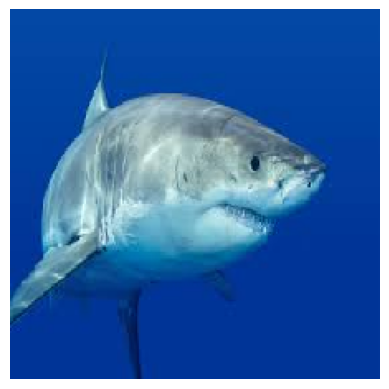

In [8]:
# Load the VGG-16 model
vgg16Model = VGG16(weights='imagenet', classes=1000)

# a sample image - change it to your own image
IMG_FILE = './sample_images/shark.jpg'

# image size constants - 224x224 is the input image dimension for the VGG-16 CNN
IMG_HEIGHT = 224
IMG_WIDTH = 224

# loads the sample image, and resizes it for the desired dimension (PIL format)
img = utils.load_img(IMG_FILE, target_size=(IMG_HEIGHT, IMG_WIDTH))
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()

# the sample image requires a few preprocessing steps in order to make it compatible with the VGG-16 model
x = utils.img_to_array(img)       # converts the image from PIL format to numpy array
x = np.expand_dims(x, axis=0)     # creates an additional dimension that represents the batch (we have a single batch containing a single image)
x = preprocess_input(x)           # VGG-16 specific preprocessing (basically a VGG-16 library function that converts the images to BGR and normalizes
                                  # the pixel values by subtracting a predefined offset)

## Predicting the class of the sample image

In [9]:
# get the predictions (returns the output of the 1000 neurons at the VGG-16's output layer)
preds = vgg16Model.predict(x)

# process the predictions using a VGG-16's library function - in this case it was setup to get the 5 most probable classes
decoded_preds = decode_predictions(preds, top=5)[0]

# Shows the classification results
print('Top-5 Class predictions: ')
for class_name, class_description, score in decoded_preds:
    print(class_description, ":", score)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
Top-5 Class predictions: 
great_white_shark :  0.9065911
tiger_shark :  0.09307701
hammerhead :  0.00020131678
sturgeon :  6.507177e-05
electric_ray :  1.9698204e-05
